# Classification: Logistic Regression

<hr>

Steps:
1. Loading Dataset
2. Some Preprocessing
3. The Logistic Function
4. The Logistic Regression Function
5. Testing the Accuracy of the Model
6. User Level Predictions

<hr>

### 1. Loading Dataset

In [62]:
# Import pandas, numpy and pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [63]:
# Consider this a dataset
dataset = {
    'age': [22, 25, 47, 52, 46, 56, 55, 60, 62, 61, 18, 28, 27, 29, 49, 30, 21, 31, 44, 33],
    'have_insurance': [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
}

# Create a dataframe out of the dataset given
data = pd.DataFrame(dataset)

# Print the length of the dataframe
print(len(data))

20


In [64]:
# Print the first 5 rows of the dataframe
print(data.head())

   age  have_insurance
0   22               0
1   25               0
2   47               1
3   52               0
4   46               1


Text(0, 0.5, 'Have Insurance')

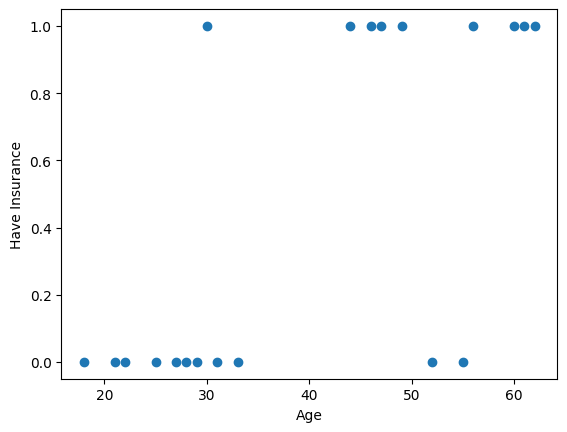

In [65]:
# Scatter plot the binary data (0, 1) based on age
plt.scatter(data['age'], data['have_insurance'])

# Label the x and y axis
plt.xlabel('Age')
plt.ylabel('Have Insurance')

<hr>

### 2. Some Preprocessing

In [66]:
# Split the data into training and testing sets
train_data = data.sample(frac=0.8, random_state=42)
test_data = data.drop(train_data.index)

# Print the length of the training and testing data
print(len(train_data))
print(len(test_data))

16
4


In [67]:
# Create the design matrix X and target vector y
X_train = train_data[['age']].values
X_test = test_data[['age']].values
y_train = train_data['have_insurance'].values.reshape(-1, 1)
y_test = test_data['have_insurance'].values.reshape(-1, 1)

<hr>

### 3. The Logistic Function or Sigmoid Function

$$\sigma(z) = \frac{1}{1 + e^{-z}}$$

In [68]:
# Define the sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Calling the sigmoid function
print('Sigmoid(-1):   ',sigmoid(-1))
print('Sigmoid(0):    ',sigmoid(0))
print('Sigmoid(1):    ',sigmoid(1))
print('Sigmoid(100):  ',sigmoid(100))

Sigmoid(-1):    0.2689414213699951
Sigmoid(0):     0.5
Sigmoid(1):     0.7310585786300049
Sigmoid(100):   1.0


<hr>

### 4. The Logistic Regression Function
Derivative wrt b: $$\nabla_w J(w,b) = \frac{1}{m}X^T(\sigma(Xw + b) - y)$$
Derivative wrt X: $$\nabla_b J(w,b) = \frac{1}{m}\sum_{i=1}^m(\sigma(Xw + b) - y)$$
Weight updation : $$w = w - \alpha \nabla_w J(w,b)$$

In [69]:
"""
    Gradients
    ---------
    gradw = np.dot(X.T, (y_pred - y)) / y.shape[0]
    gradb = np.sum(y_pred - y) / y.shape[0]

    Update Parameters
    ----------
    w = w - lr * gradw
    b = b - lr * gradb
"""

# Define the logistic regression function
def logistic_regression(X, y, num_iter, lr):
    # Initialize the parameters
    w = np.zeros((X.shape[1], 1))
    b = 0
    # Loop over the number of iterations
    for i in range(num_iter):
        # Calculate the logits
        logits = np.dot(X, w) + b
        # Apply the sigmoid function to the logits
        y_pred = sigmoid(logits)
        # Calculate the gradient of the loss function
        gradw = np.dot(X.T, (y_pred - y)) / y.shape[0]
        gradb = np.sum(y_pred - y) / y.shape[0]
        # Update the parameters
        w = w - lr * gradw
        b = b - lr * gradb
        
    # Return the parameters
    return w, b
    

In [70]:
# Train the logistic regression model
w, b = logistic_regression(X_train, y_train, num_iter=10000, lr=0.01)

# Print the learned parameters
print('Learned parameters:')
print('w =', w)
print('b =', b)

Learned parameters:
w = [[0.1442072]]
b = -5.7829807196468215


<hr>

### 5. Testing Accuracies of the Model

In [71]:
# Define the prediction function
def predict(X, w, b):
    # Calculate the logits
    logits = np.dot(X, w) + b   
    # Apply the sigmoid function to the logits
    y_pred = sigmoid(logits)
    # Convert the probabilities to binary predictions
    y_pred = np.round(y_pred)
    # Return the predictions
    return y_pred

In [72]:
# Test the logistic regression model
accuracy_train = np.mean(np.array_equal(y_pred_train, y_train))
accuracy_test = np.mean(np.array_equal(y_pred_test, y_test))


# Calculate the accuracy of the logistic regression model
accuracy_train = np.mean(y_pred_train == y_train)
accuracy_test = np.mean(y_pred_test == y_test)

print('Train accuracy:', accuracy_train)
print('Test accuracy:', accuracy_test)

Train accuracy: 0.5078125
Test accuracy: 0.5


<hr>

### 6. User Level Predictions

In [73]:
age = int(input("Enter the age: "))
if predict(np.array([[age]]), w, b) == 1:
    print("The person will buy insurance")
else:
    print("The person will not buy insurance")

The person will buy insurance


<hr>